In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Explore Data Structure

In [34]:
creditcard = pd.read_csv("creditcard.csv")

In [35]:
creditcard.info()
## No missing values
## Class (1-Fraud,0-NotFraud) should be character rather than int.
#creditcard['Class'] =  creditcard['Class'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [36]:
creditcard.head()
## V1-V28 are features that have been transformed using PCA.These variables would be used to predict Fraud.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
creditcard.describe()
## V1-V28 have different scales, normalization would be needed.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [38]:
print("Count of Fraud: {}".format(len(creditcard[creditcard.Class==1])))
print("Count of NotFraud: {}".format(len(creditcard[creditcard.Class==0])))
print("Percentage of Fraud: {:.2f}%".format(len(creditcard[creditcard.Class==1])/len(creditcard)*100))
## Fraud only accounts for 0.17% of total data, data is highly unbalanced.
## This is the normal case in Fraud-detection because the anormality should be minor.

Count of Fraud: 492
Count of NotFraud: 284315
Percentage of Fraud: 0.17%


## Build Prediction Model

### Deal with unbalanced data

In [39]:
## The data is highly unbalanced, which would affect prediction results. Use under-sampling method to get balanced data.
Fraud_obs = creditcard[creditcard.Class==1]
Not_Fraud_obs = creditcard[creditcard.Class==0]
Not_Fraud_undersample = Not_Fraud_obs.sample(n=len(Fraud_obs),random_state=1234)
print("Count of Fraud: {}".format(len(Fraud_obs)))
print("Count of Not_Fraud_undersample: {}".format(len(Not_Fraud_undersample)))
df = Not_Fraud_undersample.append(Fraud_obs,ignore_index=True)

Count of Fraud: 492
Count of Not_Fraud_undersample: 492


### Normalize data

In [40]:
## Normalize independant variables for balanced data
X = df.drop(['Time','Amount','Class'],axis=1)
normalize = StandardScaler().fit(X)
X_normalized = normalize.transform(X)

In [41]:
y = df.Class

### Split data into training and test

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_normalized,y,test_size=0.3,random_state=1234)

### Define Measures for Classification

In [78]:
def classifier_measures(y_test,model_pred):
    # output confusion matrix
    print ("---------------------------------------Confusion Matrix------------------------------------------")
    model_matrix = confusion_matrix(y_test, model_pred)
    # print ('Confusion matrix:\n',model_matrix)
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",model_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",model_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",model_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",model_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(model_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    
    print()
    print ("--------------------------------------Precession and Recall-----------------------------------------")
    target_names = ['Not_Fraud',"Fraud"]
    print(classification_report(y_test, model_pred, target_names=target_names))
    #print("the recall for this model is :",knn_matrix[1,1]/(knn_matrix[1,1]+knn_matrix[1,0]))


### KNN Model

___________________________________________Model Selection__________________________________________________
Best estimator found by grid search: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
Best parameters found by grid search: {'n_neighbors': 1, 'metric': 'manhattan'}
Best accuracy score found by grid search: 0.925872093023

___________________________________________Model Prediction_________________________________________________
Accuracy: 0.922297297297

---------------------------------------Confusion Matrix------------------------------------------
TP 120
TN 153
FP 8
FN 15


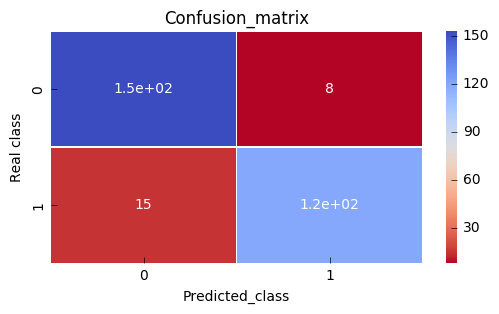


--------------------------------------Precession and Recall-----------------------------------------
             precision    recall  f1-score   support

  Not_Fraud       0.91      0.95      0.93       161
      Fraud       0.94      0.89      0.91       135

avg / total       0.92      0.92      0.92       296



In [79]:
# Initialize classifier
knn = KNeighborsClassifier()

# Declare parameters to tune
n_neighbors = list(range(1,11))
distance = ['euclidean','manhattan']
knn_params = {'n_neighbors':n_neighbors,'metric':distance}
knn_gs = GridSearchCV(knn,knn_params,scoring='accuracy',cv=5)
knn_gs.fit(X_train,y_train)
print ("___________________________________________Model Selection__________________________________________________")
print ("Best estimator found by grid search:",knn_gs.best_estimator_)
print ("Best parameters found by grid search:",knn_gs.best_params_)
print ("Best accuracy score found by grid search:",knn_gs.best_score_)
print ()

# Predict new values using best model derived from cross validation and test performance on the test set
# knn_gs.predict(X_test) is equivalent to knn_gs.best_estimator_.predict(X_test)
knn_pred = knn_gs.predict(X_test)
knn_prob = knn_gs.predict_proba(X_test)
knn_score = knn_gs.score(X_test, y_test)
print ("___________________________________________Model Prediction_________________________________________________")
print ('Accuracy:', knn_score)
print ()
classifier_measures(y_test,knn_pred)

### Decision Tree

___________________________________________Model Selection__________________________________________________
Best estimator found by grid search: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best parameters found by grid search: {'min_samples_split': 15, 'max_depth': 3}
Best accuracy score found by grid search: 0.9375

___________________________________________Model Prediction_________________________________________________
Accuracy: 0.932432432432

---------------------------------------Confusion Matrix------------------------------------------
TP 122
TN 154
FP 7
FN 13


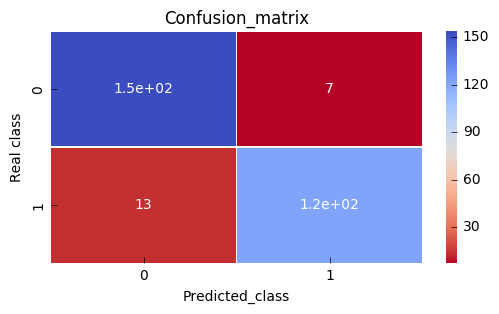


--------------------------------------Precession and Recall-----------------------------------------
             precision    recall  f1-score   support

  Not_Fraud       0.92      0.96      0.94       161
      Fraud       0.95      0.90      0.92       135

avg / total       0.93      0.93      0.93       296



In [80]:
# Initialize classifier
dtree = tree.DecisionTreeClassifier()

# Declare parameters to tune
depth = np.arange(1,21,2)
samplesplit = np.arange(5,31,5)
dtree_params = {'max_depth':depth,'min_samples_split':samplesplit}
dtree_gs = GridSearchCV(dtree,dtree_params,scoring='accuracy',cv=5)
dtree_gs.fit(X_train,y_train)
print ("___________________________________________Model Selection__________________________________________________")
print ("Best estimator found by grid search:",dtree_gs.best_estimator_)
print ("Best parameters found by grid search:",dtree_gs.best_params_)
print ("Best accuracy score found by grid search:",dtree_gs.best_score_)
print ()

# Predict new values using best model derived from cross validation and test performance on the test set
dtree_pred = dtree_gs.predict(X_test)
dtree_prob = dtree_gs.predict_proba(X_test)
dtree_score = dtree_gs.score(X_test, y_test)
print ("___________________________________________Model Prediction_________________________________________________")
print ('Accuracy:', dtree_score)
print ()
classifier_measures(y_test,dtree_pred)

### SVM

___________________________________________Model Selection__________________________________________________
Best estimator found by grid search: SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best parameters found by grid search: {'kernel': 'poly', 'C': 9}
Best accuracy score found by grid search: 0.936046511628

___________________________________________Model Prediction_________________________________________________
Accuracy: 0.935810810811

---------------------------------------Confusion Matrix------------------------------------------
TP 118
TN 159
FP 2
FN 17


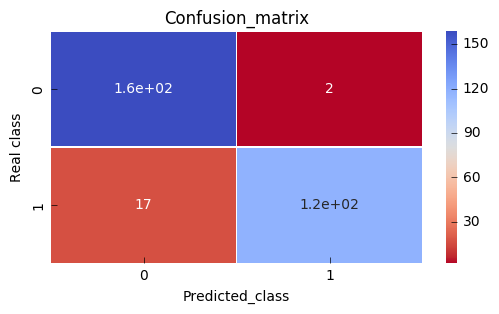


--------------------------------------Precession and Recall-----------------------------------------
             precision    recall  f1-score   support

  Not_Fraud       0.90      0.99      0.94       161
      Fraud       0.98      0.87      0.93       135

avg / total       0.94      0.94      0.94       296



In [81]:
# Initialize classifier
svm = SVC(probability=True)

# Declare parameters to tune
C=np.arange(1,11,2) 
kernel=['linear', 'poly','rbf']
svm_params = {'C':C,'kernel':kernel}
svm_gs = GridSearchCV(svm,svm_params,scoring='accuracy',cv=5)
svm_gs.fit(X_train,y_train)
print ("___________________________________________Model Selection__________________________________________________")
print ("Best estimator found by grid search:",svm_gs.best_estimator_)
print ("Best parameters found by grid search:",svm_gs.best_params_)
print ("Best accuracy score found by grid search:",svm_gs.best_score_)
print ()

# Predict new values using best model derived from cross validation and test performance on the test set
svm_pred = svm_gs.predict(X_test)
svm_prob = svm_gs.predict_proba(X_test)
svm_score = svm_gs.score(X_test, y_test)
print ("___________________________________________Model Prediction_________________________________________________")
print ('Accuracy:', svm_score)
print ()
classifier_measures(y_test,svm_pred)

### Boosting

___________________________________________Model Selection__________________________________________________
Best estimator found by grid search: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Best parameters found by grid search: {'n_estimators': 400, 'learning_rate': 0.005, 'max_depth': 2}
Best accuracy score found by grid search: 0.943313953488

___________________________________________Model Prediction_________________________________________________
Accuracy: 0.922297297297

---------------------------------------Confusion Matrix---------------------------------

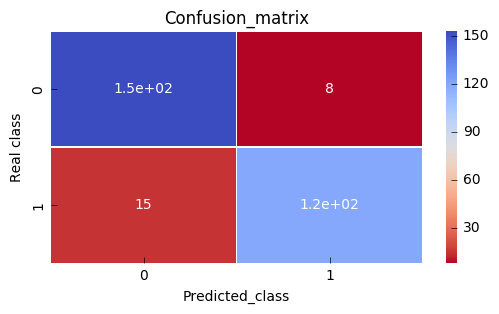


--------------------------------------Precession and Recall-----------------------------------------
             precision    recall  f1-score   support

  Not_Fraud       0.91      0.95      0.93       161
      Fraud       0.94      0.89      0.91       135

avg / total       0.92      0.92      0.92       296



In [82]:
# Initialize classifier
gbt = GradientBoostingClassifier()

# Declare parameters to tune
gbt_params = {'learning_rate': [.005,.01,.03,.05,.1], 'n_estimators' : [200,400], 'max_depth' : [2,3]}
gbt_gs = GridSearchCV(gbt,gbt_params,scoring='accuracy',cv=5)
gbt_gs.fit(X_train,y_train)
print ("___________________________________________Model Selection__________________________________________________")
print ("Best estimator found by grid search:",gbt_gs.best_estimator_)
print ("Best parameters found by grid search:",gbt_gs.best_params_)
print ("Best accuracy score found by grid search:",gbt_gs.best_score_)
print ()

# Predict new values using best model derived from cross validation and test performance on the test set
gbt_pred = gbt_gs.predict(X_test)
gbt_prob = gbt_gs.predict_proba(X_test)
gbt_score = gbt_gs.score(X_test, y_test)
print ("___________________________________________Model Prediction_________________________________________________")
print ('Accuracy:', gbt_score)
print ()
classifier_measures(y_test,gbt_pred)

### Neural Network

___________________________________________Model Selection__________________________________________________
Best estimator found by grid search: MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=25, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Best parameters found by grid search: {'activation': 'tanh', 'hidden_layer_sizes': 25}
Best accuracy score found by grid search: 0.9375

___________________________________________Model Prediction_________________________________________________
Accuracy: 0.949324324324

---------------------------------------Confusion Matrix------------------------------------------
TP 123
TN 158
FP 3
FN 12


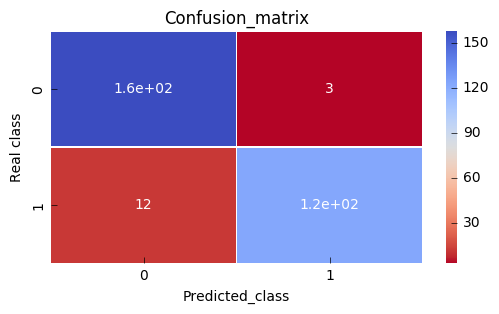


--------------------------------------Precession and Recall-----------------------------------------
             precision    recall  f1-score   support

  Not_Fraud       0.93      0.98      0.95       161
      Fraud       0.98      0.91      0.94       135

avg / total       0.95      0.95      0.95       296



In [83]:
# Initialize classifier
nn = MLPClassifier(max_iter=100000000)

# Declare parameters to tune
activation = ['logistic', 'tanh', 'relu']
nn_params = {'hidden_layer_sizes':[(25),(25,25)],'activation':activation}
nn_gs = GridSearchCV(nn,nn_params,scoring='accuracy',cv=5)
nn_gs.fit(X_train,y_train)
print ("___________________________________________Model Selection__________________________________________________")
print ("Best estimator found by grid search:",nn_gs.best_estimator_)
print ("Best parameters found by grid search:",nn_gs.best_params_)
print ("Best accuracy score found by grid search:",nn_gs.best_score_)
print ()

# Predict new values using best model derived from cross validation and test performance on the test set
nn_pred = nn_gs.predict(X_test)
nn_prob = nn_gs.predict_proba(X_test)
nn_score = nn_gs.score(X_test, y_test)
print ("___________________________________________Model Prediction_________________________________________________")
print ('Accuracy:', nn_score)
print ()
classifier_measures(y_test,nn_pred)

## ROC and AUC

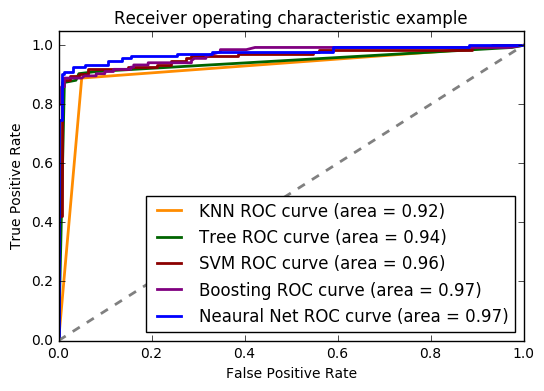

In [84]:
##roc curve
fpr = dict()
tpr = dict()
threholds = dict()
roc_auc = dict()
classlabel = 1

#Plot of a ROC curve for a specific class
plt.figure()
lw = 2

fpr, tpr, thresholds = roc_curve(y_test, knn_prob[:, classlabel])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='KNN ROC curve (area = {:.2f})'.format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, dtree_prob[:, classlabel])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkgreen',
         lw=lw, label='Tree ROC curve (area = {:.2f})'.format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, svm_prob[:, classlabel])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='SVM ROC curve (area = {:.2f})'.format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, gbt_prob[:, classlabel])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='Boosting ROC curve (area = {:.2f})'.format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, nn_prob[:, classlabel])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='Neaural Net ROC curve (area = {:.2f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Model Comparision

Neaural Network has the highest Accuracy score 0.95.
For fraud detection, we would prefer greater recall, because it indicates that the model could identify most of the fraud.
According to ROC curve and AUC, Neaural Network also has better performance.